<a href="https://colab.research.google.com/github/Viktory4121/diploma/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
import xlrd
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from collections import Counter

In [25]:
uploaded = files.upload()

Saving ConvertedTable.xlsx to ConvertedTable (1).xlsx


In [26]:
data = pd.read_excel(uploaded['ConvertedTable.xlsx'])
pdata = pd.DataFrame(data)
#Удаление лишних столбцов
pdata = pdata.drop('Отметка времени', axis=1)
pdata = pdata.drop('Учебное заведение', axis=1)
pdata = pdata.drop('Направление и профиль', axis=1)
pdata = pdata.drop('Курс', axis=1)

#Изменение формата представления пола студента
pdata['Мужской пол'] = [int(pdata['Пол'][i] == 'Мужской') for i in range(len(pdata))]
pdata = pdata.drop('Пол', axis=1)

pdata

,Возраст,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",...,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких,Мужской пол
0,20,6,6,6,8,5,5,3,3,7,...,10,10,7,8,10,8,10,2,2,1
1,20,10,10,5,0,0,0,5,4,0,...,0,2,0,0,0,0,0,1,0,0
2,20,1,1,0,0,1,0,4,10,4,...,2,10,0,10,10,10,10,4,0,1
3,20,5,5,4,4,4,4,4,5,4,...,3,5,5,5,3,5,5,0,1,0
4,20,0,0,5,0,3,4,0,7,0,...,0,5,0,4,5,0,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,23,3,1,1,1,3,3,2,7,5,...,0,0,0,0,4,0,0,0,0,1
103,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#таблица с ответами только из 2й части анкеты (52 СТОЛБЦА)
#x = np.array(pdata[pdata.columns[1:53]].copy())
x = pdata[pdata.columns[1:53]].copy()
x

,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",Не нравятся некоторые преподаватели,...,Меня не уважают в коллективе,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких
0,6,6,6,8,5,5,3,3,7,2,...,8,10,10,7,8,10,8,10,2,2
1,10,10,5,0,0,0,5,4,0,0,...,0,0,2,0,0,0,0,0,1,0
2,1,1,0,0,1,0,4,10,4,10,...,0,2,10,0,10,10,10,10,4,0
3,5,5,4,4,4,4,4,5,4,8,...,0,3,5,5,5,3,5,5,0,1
4,0,0,5,0,3,4,0,7,0,5,...,0,0,5,0,4,5,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,3,1,1,1,3,3,2,7,5,1,...,0,0,0,0,0,4,0,0,0,0
103,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#переобозначение вопросов в номера
name_col = ['Q-1', 'Q-2', 'Q-3', 'Q-4', 'Q-5', 'Q-6', 'Q-7', 'Q-8', 'Q-9', 'Q-10',
            'Q-11', 'Q-12', 'Q-13', 'Q-14', 'Q-15', 'Q-16', 'Q-17', 'Q-18', 'Q-19', 'Q-20',
            'Q-21', 'Q-22', 'Q-23', 'Q-24', 'Q-25', 'Q-26', 'Q-27', 'Q-28', 'Q-29', 'Q-30',
            'Q-31', 'Q-32', 'Q-33', 'Q-34', 'Q-35', 'Q-36', 'Q-37', 'Q-38', 'Q-39', 'Q-40',
            'Q-41', 'Q-42', 'Q-43', 'Q-44', 'Q-45', 'Q-46', 'Q-47', 'Q-48', 'Q-49', 'Q-50',
            'Q-51', 'Q-52']

In [29]:
#удаление 13 значимых и малозначимых вопросов из выборки под индексами: [16,17,20,27,28,31,34,36,37,38,47,49,50]
#39 столбцов стало
#и ещё удаляем вопросы... осталось 28

#x = np.delete(x, [7,8,14,16,17,24,26,28,31,32,
#                  33,34,35,36,37,38,40,42,45,47,48,49,50,51], 1)

#если х - датафрейм
x.columns = name_col
x = x.drop(['Q-8', 'Q-9', 'Q-15', 'Q-17', 'Q-18', 'Q-25', 'Q-27', 'Q-29', 'Q-32', 'Q-33',
 'Q-34', 'Q-35', 'Q-36', 'Q-37', 'Q-38', 'Q-39', 'Q-41', 'Q-43', 'Q-46', 'Q-48', 'Q-49', 'Q-50', 'Q-51', 'Q-52'], axis=1)
x

,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,Q-10,Q-11,Q-12,...,Q-24,Q-26,Q-28,Q-30,Q-31,Q-40,Q-42,Q-44,Q-45,Q-47
0,6,6,6,8,5,5,3,2,2,8,...,10,10,8,10,10,4,10,10,10,8
1,10,10,5,0,0,0,5,0,0,0,...,5,2,2,10,8,0,0,0,2,0
2,1,1,0,0,1,0,4,10,8,5,...,1,0,0,4,8,2,0,2,10,10
3,5,5,4,4,4,4,4,8,8,8,...,5,7,0,8,8,0,3,3,5,5
4,0,0,5,0,3,4,0,5,10,2,...,5,5,3,0,10,5,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,8,0,0,0,0,0,0,0,0,...,0,0,0,5,4,0,0,0,0,0
102,3,1,1,1,3,3,2,1,3,0,...,0,0,0,0,5,0,0,0,0,0
103,0,8,0,0,0,0,0,0,0,0,...,0,0,0,5,4,0,0,0,0,0
104,0,8,0,0,0,0,0,0,0,0,...,0,0,0,5,4,0,0,0,0,0


In [30]:
#17,18,21,28,29,32,35,37,38,39,48,50,51 - номера вопросов
#они либо значимые, либо малозначимые, выделенные в регрессионном анализе
#x = x[:,[16,17,20,27,28,31,34,36,37,38,47,49,50]]

#МЕТОД ЛОГТЯ

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

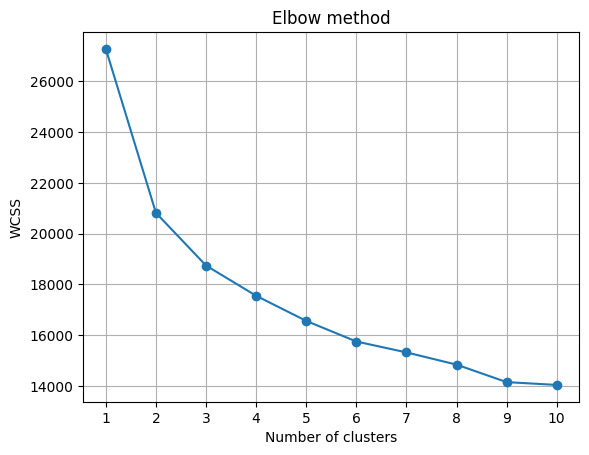

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.xticks(range(1,11))
plt.grid(True)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#2 cluster

In [32]:
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(x)
predict_2cl = kmeans_2.predict(x)
#print(predict_2cl)
#print(kmeans_2.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_2cl)

Counter({0: 43, 1: 63})

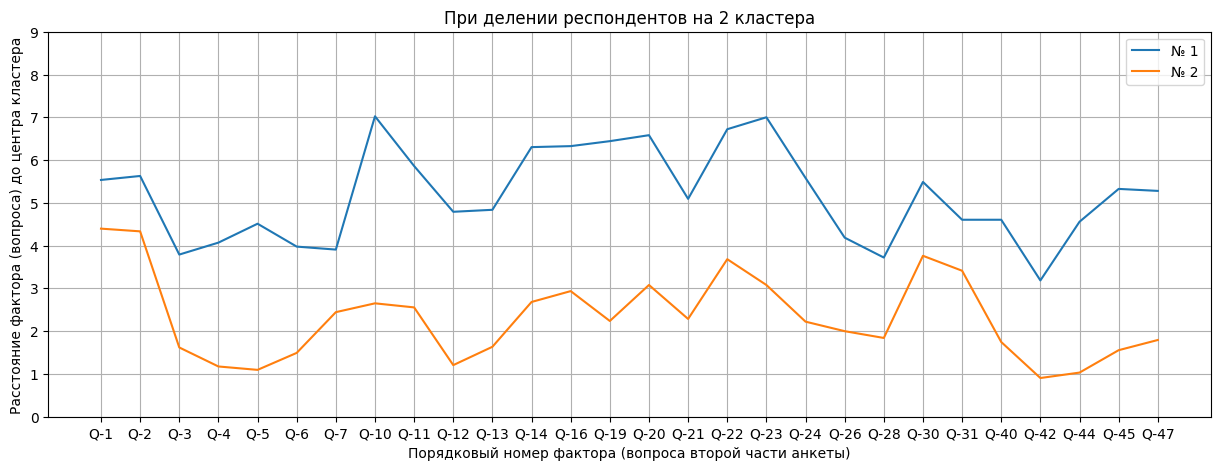

In [34]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(list(x.columns), kmeans_2.cluster_centers_[0])
plt.plot(list(x.columns), kmeans_2.cluster_centers_[1])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 9])
#plt.xticks(range(len(x[0])))
plt.yticks(range(10))

plt.grid(True)
plt.title('При делении респондентов на 2 кластера')
plt.xlabel('Порядковый номер фактора (вопроса второй части анкеты)')
plt.ylabel('Расстояние фактора (вопроса) до центра кластера')
plt.legend(['№ 1', '№ 2'])

#1 - 10,20,22,23
#2 - 1,2,22,30,31

#3 cluster

In [35]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(x)
predict_3cl = kmeans_3.predict(x)
#print(predict_3cl)
#print(kmeans_3.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_3cl)

Counter({2: 13, 1: 51, 0: 42})

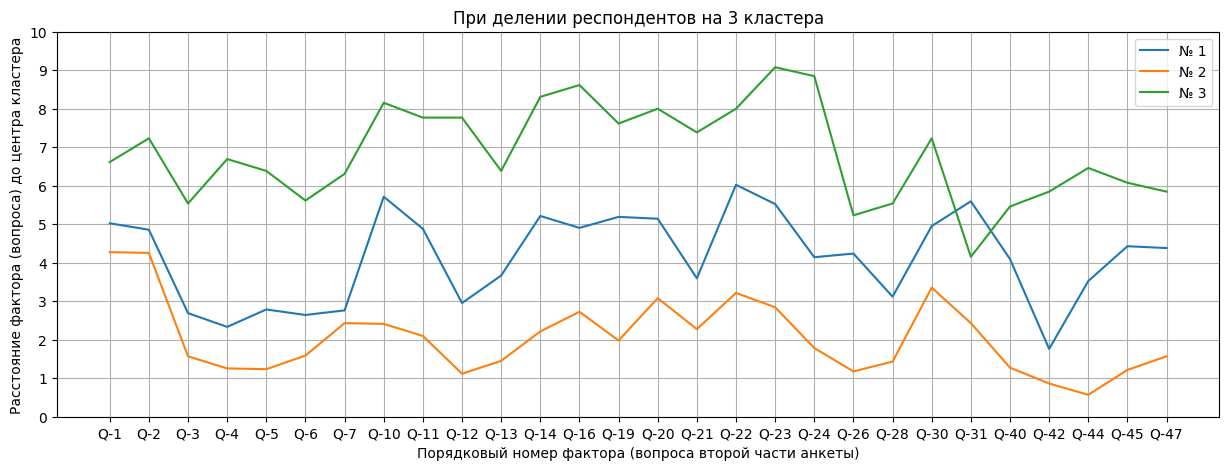

In [37]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(list(x.columns), kmeans_3.cluster_centers_[0])
plt.plot(list(x.columns), kmeans_3.cluster_centers_[1])
plt.plot(list(x.columns), kmeans_3.cluster_centers_[2])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
#plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('При делении респондентов на 3 кластера')
plt.xlabel('Порядковый номер фактора (вопроса второй части анкеты)')
plt.ylabel('Расстояние фактора (вопроса) до центра кластера')
plt.legend(['№ 1', '№ 2', '№ 3'])

#1 - 10,14,22,23,31
#2 - 1,2,16,20,22,23,30
#3 - 14,16,23,24

#4 cluster

In [38]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(x)
predict_4cl = kmeans_4.predict(x)
#print(predict_4cl)
#print(kmeans_4.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_4cl)

Counter({2: 13, 0: 37, 1: 29, 3: 27})

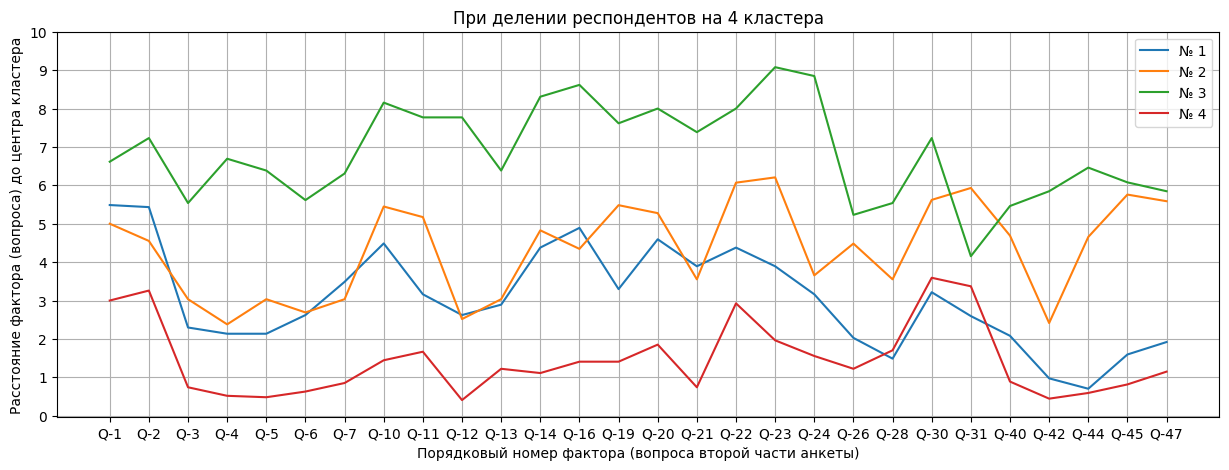

In [40]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(list(x.columns), kmeans_4.cluster_centers_[0])
plt.plot(list(x.columns), kmeans_4.cluster_centers_[1])
plt.plot(list(x.columns), kmeans_4.cluster_centers_[2])
plt.plot(list(x.columns), kmeans_4.cluster_centers_[3])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
#plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('При делении респондентов на 4 кластера')
plt.xlabel('Порядковый номер фактора (вопроса второй части анкеты)')
plt.ylabel('Расстояние фактора (вопроса) до центра кластера')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4'])

#1 - 1,2,10,14,16,20,22
#2 - 10,11,19,20,22,23,30,31,45,47
#3 - 10,14,16,23,24
#4 - 1,2,22,30,31

#5 clusters

In [41]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(x)
predict_5cl = kmeans_5.predict(x)
#print(predict_5cl)
#print(kmeans_5.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_5cl)

Counter({3: 8, 1: 22, 2: 25, 0: 27, 4: 24})

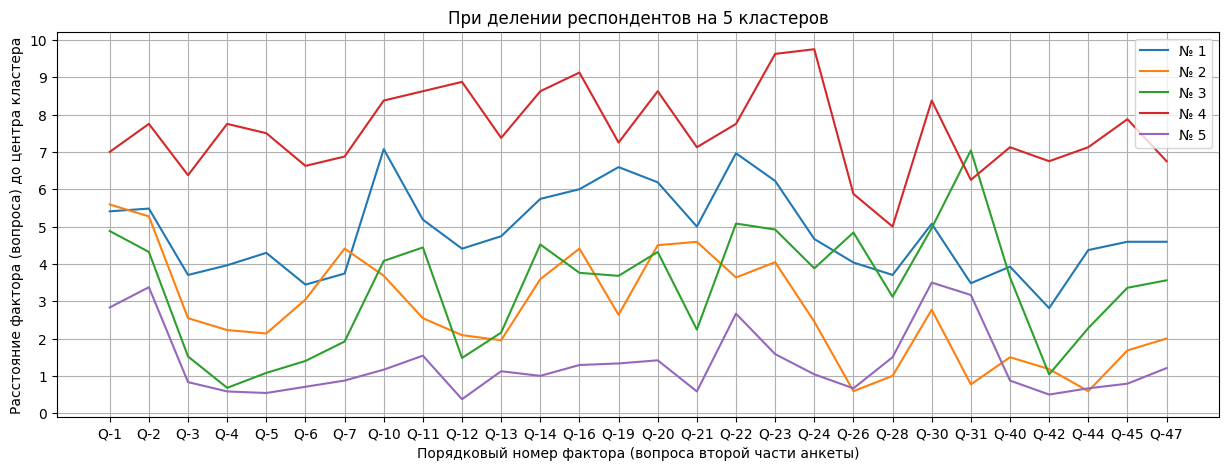

In [43]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(list(x.columns), kmeans_5.cluster_centers_[0])
plt.plot(list(x.columns), kmeans_5.cluster_centers_[1])
plt.plot(list(x.columns), kmeans_5.cluster_centers_[2])
plt.plot(list(x.columns), kmeans_5.cluster_centers_[3])
plt.plot(list(x.columns), kmeans_5.cluster_centers_[4])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
#plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('При делении респондентов на 5 кластеров')
plt.xlabel('Порядковый номер фактора (вопроса второй части анкеты)')
plt.ylabel('Расстояние фактора (вопроса) до центра кластера')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4', '№ 5'])

#1 - 10,19,22
#2 - 1,2,7,16,20,21
#3 - 1,2,22,23,26,31
#4 - 16,23,24
#5 - 1,2,22,30,31

#6 clusters

In [44]:
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(x)
predict_6cl = kmeans_6.predict(x)
#print(predict_6cl)
#print(kmeans_6.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_6cl)

Counter({1: 14, 3: 19, 5: 19, 4: 22, 0: 24, 2: 8})

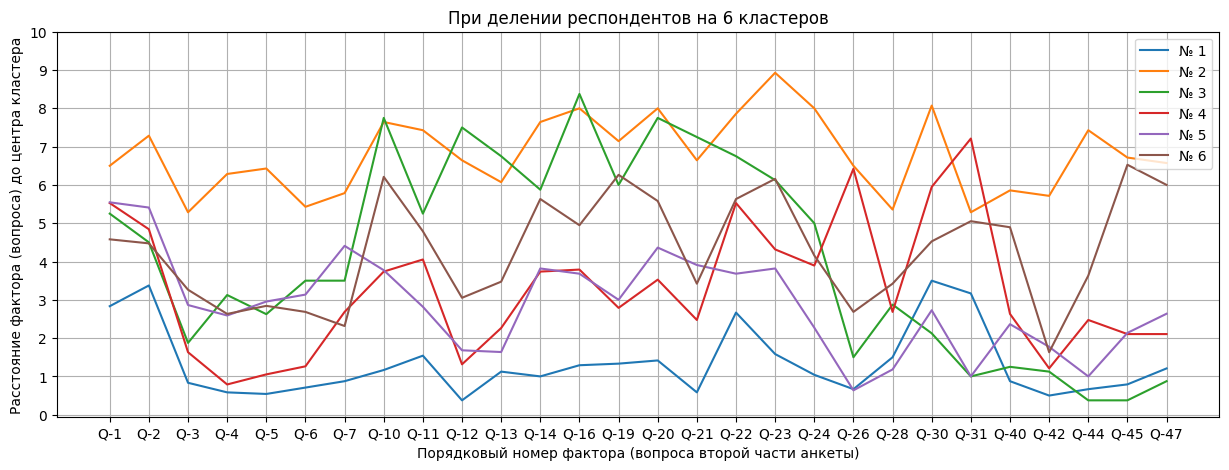

In [46]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(list(x.columns), kmeans_6.cluster_centers_[0])
plt.plot(list(x.columns), kmeans_6.cluster_centers_[1])
plt.plot(list(x.columns), kmeans_6.cluster_centers_[2])
plt.plot(list(x.columns), kmeans_6.cluster_centers_[3])
plt.plot(list(x.columns), kmeans_6.cluster_centers_[4])
plt.plot(list(x.columns), kmeans_6.cluster_centers_[5])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, -1, 11])
#plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('При делении респондентов на 6 кластеров')
plt.xlabel('Порядковый номер фактора (вопроса второй части анкеты)')
plt.ylabel('Расстояние фактора (вопроса) до центра кластера')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4', '№ 5', '№ 6'])

#1 - 1,2,22,30,31
#2 - 16,20,23,30
#3 - 10,12,16,20,21
#4 - 1,2,22,26,30,31
#5 - 1,2,7,20
#6 - 10,14,19,20,22,23,45,47